In [2]:
# import stuff etc.

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import colors
import matplotlib.gridspec as gridspec
# from mne.viz import circular_layout, plot_connectivity_circle
import itertools
%pylab inline 

from matplotlib.backends.backend_pdf import PdfPages
from IPython.display import Image,HTML,clear_output,display as d
from nilearn.plotting import plot_roi,plot_anat

import os;
import os,sys,pandas as pd,numpy as np, scipy

Populating the interactive namespace from numpy and matplotlib


/data/mcintosh_lab/aeasson/miniconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
/data/mcintosh_lab/aeasson/miniconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


/data/mcintosh_lab/aeasson/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/data/mcintosh_lab/aeasson/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


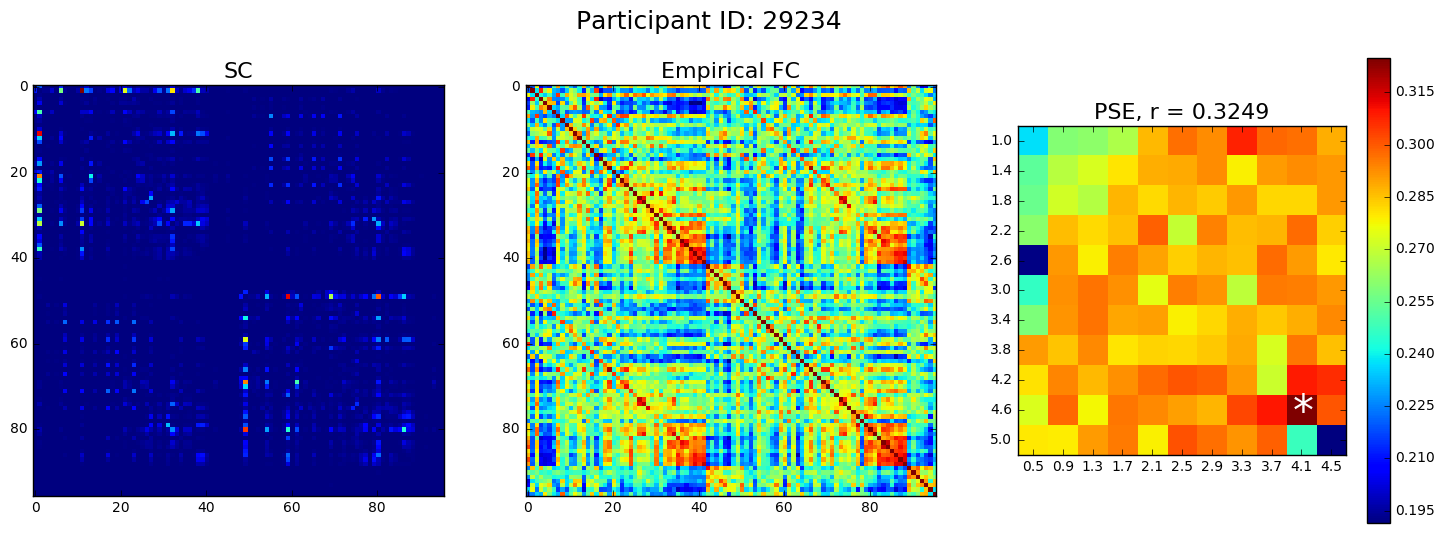

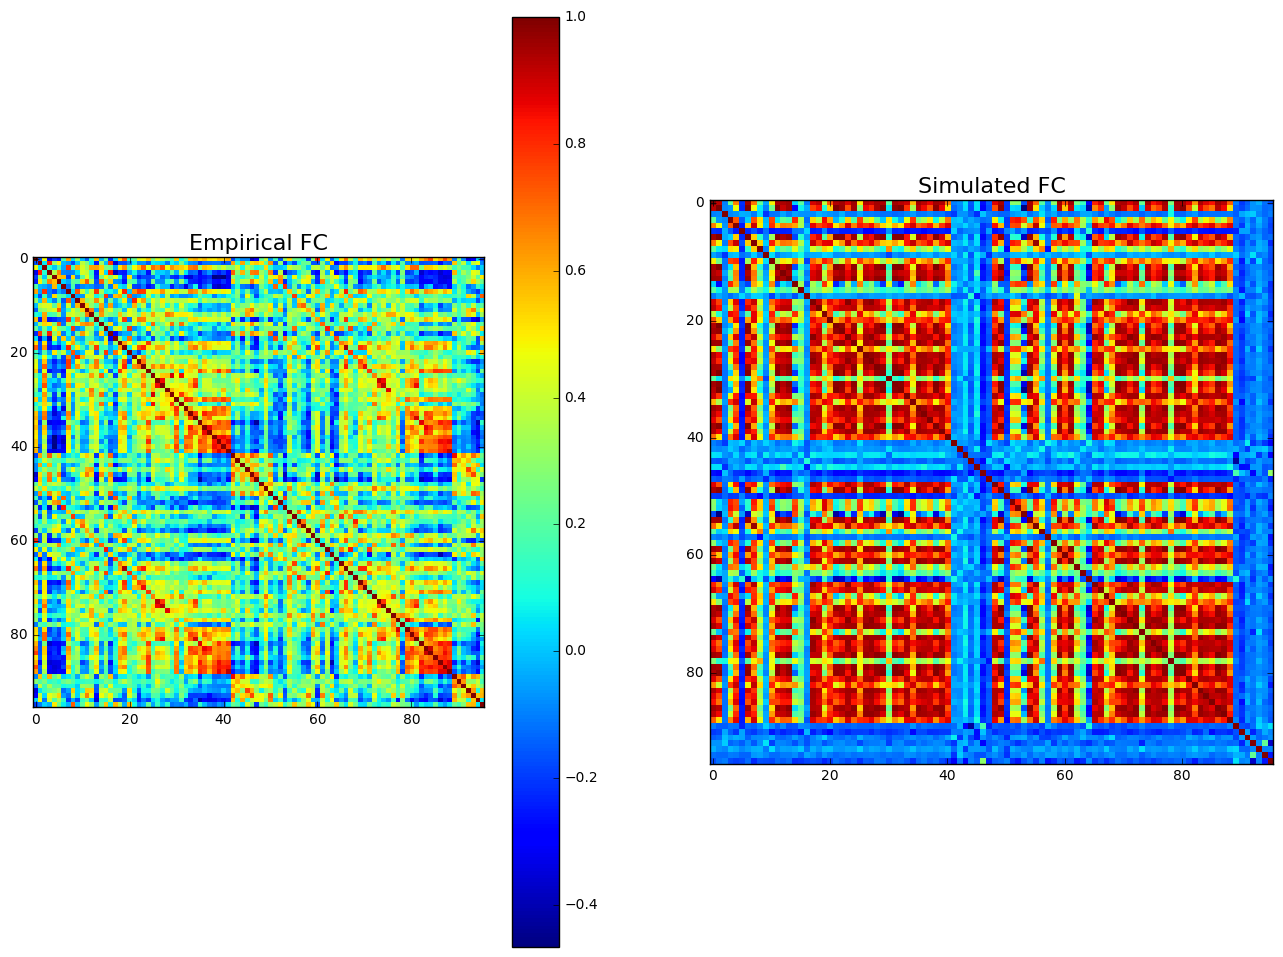

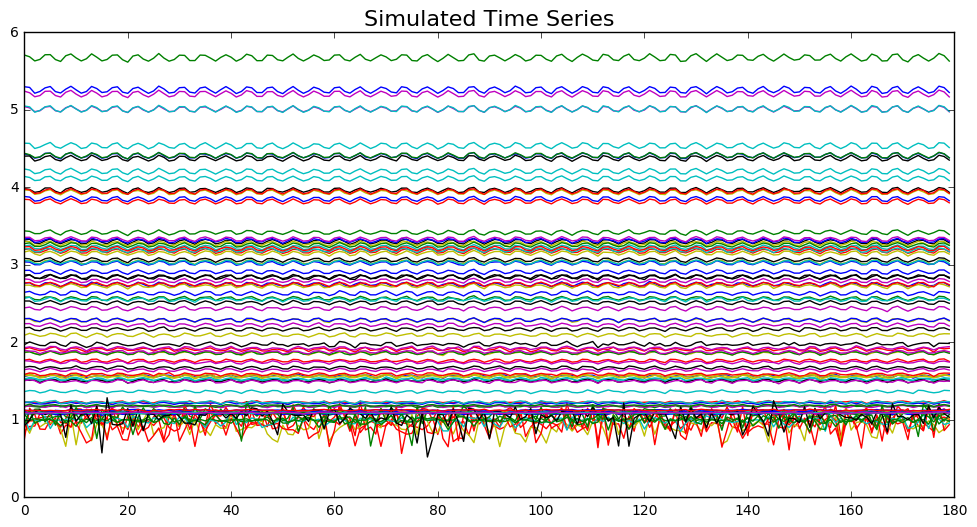

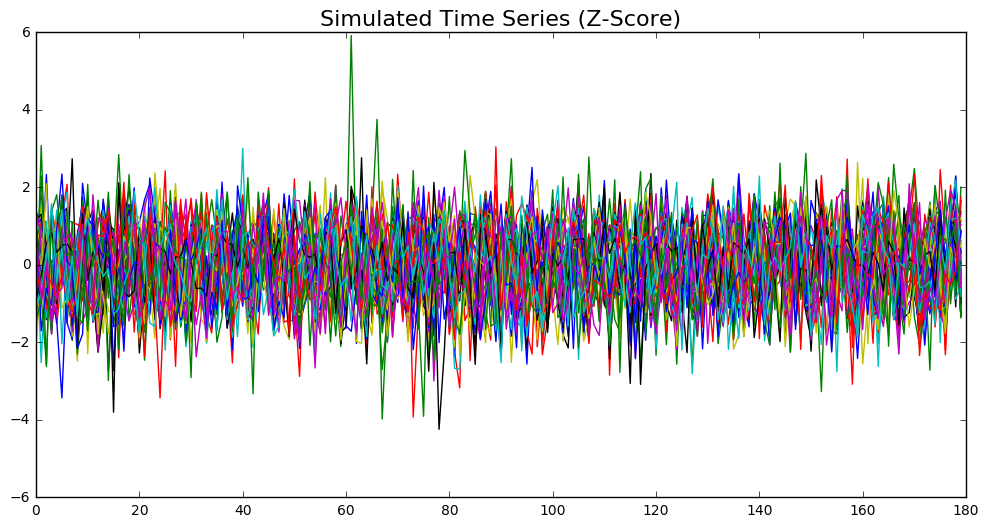

In [125]:
# test3_ins1 subjects: 29177 29180 29181 29182 29233 29234 29235 29241 29242

psesubj = '29234'

simname = 'test3_ins1'

pseparam1 = np.linspace(1.0,5.0,11)
pseparam2 = np.linspace(0.5,4.5,11)

psetemp = np.loadtxt('output_'+simname+'_' + psesubj + '.txt')
psetemp = psetemp[:,1:4]

pse = np.zeros((np.max(psetemp[:,0])+1,np.max(psetemp[:,1])+1))

for i in range(psetemp.shape[0]):
    pse[psetemp[i,0],psetemp[i,1]] = psetemp[i,2]
    

sc = np.loadtxt('subjects/' + psesubj + '/weights.txt')
fc = np.loadtxt('subjects/' + psesubj + '/fmri.txt')

# PLOT SC, EMP FC, PSE    
fig = figure(figsize = (18,6))
plt.suptitle('Participant ID: ' + psesubj,fontsize=18)

ax1 = fig.add_subplot(1,3,3); 
plot = plt.imshow(pse,interpolation='nearest'); 
fig.colorbar(plot);
r = np.max(np.max(pse))
r = round(r,4)
r = str(r)
plt.title('PSE, r = ' + r, fontsize=16)
ax1.set_yticks(np.linspace(0,np.max(psetemp[:,0]),np.max(psetemp[:,0])+1))
ax1.set_yticklabels(pseparam1)
ax1.set_xticks(np.linspace(0,np.max(psetemp[:,0]),np.max(psetemp[:,0])+1))
ax1.set_xticklabels(pseparam2)
[best_1,best_2] = np.where(pse == np.max(np.max(pse)))
ax1.annotate('*',fontsize=30,xy=(best_2[0]-.3,best_1[0]+.5),color='white')

ax2 = fig.add_subplot(1,3,1);
plt.imshow(sc,interpolation='nearest')
plt.title('SC',fontsize=16)

ax2 = fig.add_subplot(1,3,2);
plt.imshow(fc,interpolation='nearest')
plt.title('Empirical FC',fontsize=16)

# PLOT EMP FC, SIM FC
fig = figure(figsize = (16,12))

ax1 = fig.add_subplot(1,2,1);
plot = plt.imshow(fc,interpolation='nearest')
plt.title('Empirical FC',fontsize=16)
fig.colorbar(plot);

ax1 = fig.add_subplot(1,2,2);
simdata = scipy.io.loadmat('subjects/'+psesubj+'/'+simname+'_'+psesubj+'/g2d_'+str(best1[0])+'_'+str(best2[0])+'.mat')
simfc = simdata['sim_fc']
plt.imshow(simfc,interpolation='nearest')
plt.title('Simulated FC',fontsize=16)

# PLOT SIM TIME SERIES
fig = figure(figsize = (12,6))

ax1 = fig.add_subplot(1,1,1);
simts = simdata['bold_data']
plt.plot(simts)
plt.title('Simulated Time Series',fontsize=16)

fig = figure(figsize = (12,6))

ax1 = fig.add_subplot(1,1,1);
simts = simdata['bold_data']
simtsZ = scipy.stats.zscore(simts)
plt.plot(simtsZ)
plt.title('Simulated Time Series (Z-Score)',fontsize=16)


In [117]:
print best_1, best_2

[10] [2]
